## Train a model with bike rental data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [11]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:148.83699	validation_1-rmse:147.14562
[1]	validation_0-rmse:127.69404	validation_1-rmse:126.66584
[2]	validation_0-rmse:113.02913	validation_1-rmse:112.54232
[3]	validation_0-rmse:102.27046	validation_1-rmse:102.43366
[4]	validation_0-rmse:90.78798	validation_1-rmse:91.45535
[5]	validation_0-rmse:81.87856	validation_1-rmse:83.12464
[6]	validation_0-rmse:73.33203	validation_1-rmse:75.17884
[7]	validation_0-rmse:69.44691	validation_1-rmse:71.69936
[8]	validation_0-rmse:66.12361	validation_1-rmse:68.50424
[9]	validation_0-rmse:63.49699	validation_1-rmse:66.25324
[10]	validation_0-rmse:60.78761	validation_1-rmse:63.99813
[11]	validation_0-rmse:59.33645	validation_1-rmse:62.84447
[12]	validation_0-rmse:54.84465	validation_1-rmse:59.10281
[13]	validation_0-rmse:53.36854	validation_1-rmse:57.96895
[14]	validation_0-rmse:50.70043	validation_1-rmse:55.61954
[15]	validation_0-rmse:49.92800	validation_1-rmse:54.97837
[16]	validation_0-rmse:49.14462	validation_1-rmse:54.50412

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [15]:
print(training_rounds)

range(0, 150)


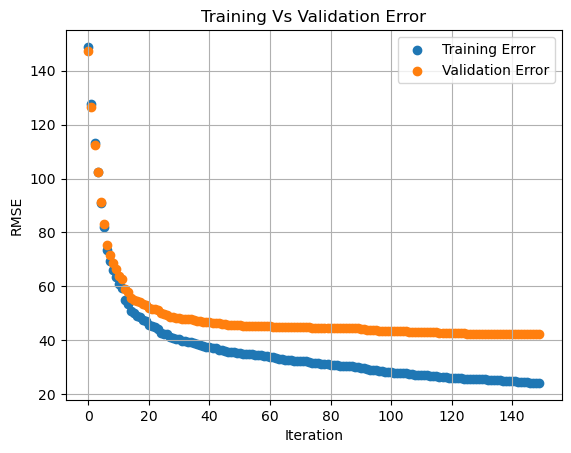

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

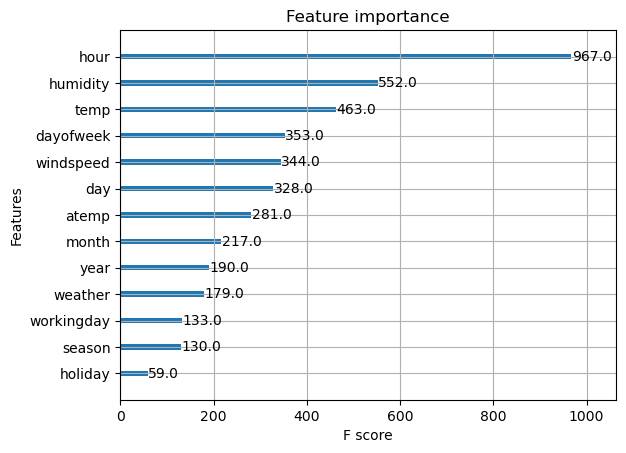

In [17]:
xgb.plot_importance(regressor)
plt.show()

In [18]:
# Verify Quality using Validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [19]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [20]:
df.shape

(3266, 14)

In [21]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [22]:
result = regressor.predict(X_test)

In [23]:
result[:5]

array([444.8635  , 397.89206 ,  12.508411,  67.253975,  68.20285 ],
      dtype=float32)

In [24]:
df['count_predicted'] = result

In [25]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,444.863495
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,397.892059
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,12.508411
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,67.253975
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,68.202850


In [26]:
# Negative Values are predicted
df['count_predicted'].describe()

count    3266.000000
mean      189.361954
std       174.003479
min       -97.060814
25%        42.983562
50%       149.013367
75%       283.084862
max       894.573608
Name: count_predicted, dtype: float64

In [27]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
18,18,2,0,1,1,18.86,22.725,33,30.0026,2012,4,5,3,2,-20.467693
35,3,2,0,1,1,19.68,23.485,63,15.0013,2011,4,19,1,3,-6.837001
95,4,2,0,1,2,17.22,21.210,71,0.0000,2012,4,19,3,4,-2.559545
100,1,1,0,1,1,6.56,6.060,31,32.9975,2011,3,3,3,4,-6.905906
103,11,3,0,1,2,27.88,31.820,83,12.9980,2012,8,14,1,2,-12.433125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,14,1,0,0,2,9.84,10.605,52,19.0012,2012,2,19,6,7,-22.018711
3176,16,4,0,1,2,12.30,14.395,52,16.9979,2012,11,5,0,4,-3.204445
3185,2,1,0,0,2,13.12,16.665,49,7.0015,2012,1,8,6,5,-6.450231
3199,8,4,0,1,1,13.94,15.910,81,15.0013,2011,11,1,1,4,-3.263650


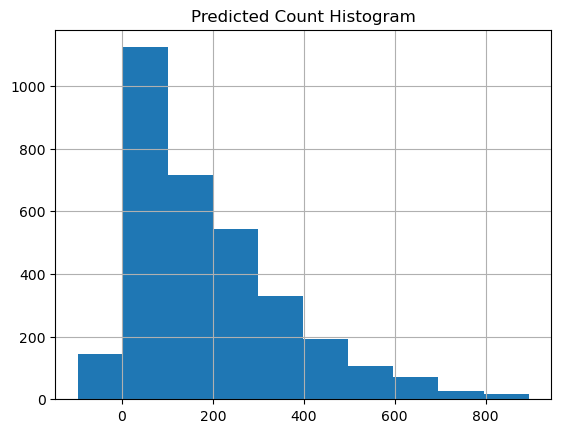

In [28]:
df['count_predicted'].hist()
plt.title('Predicted Count Histogram')
plt.show()

In [29]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [30]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [31]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


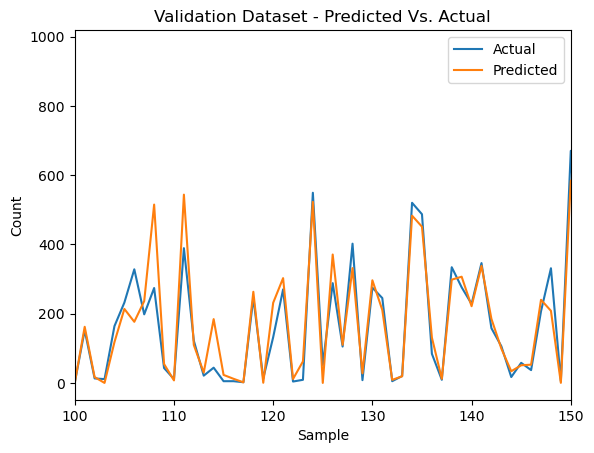

In [32]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

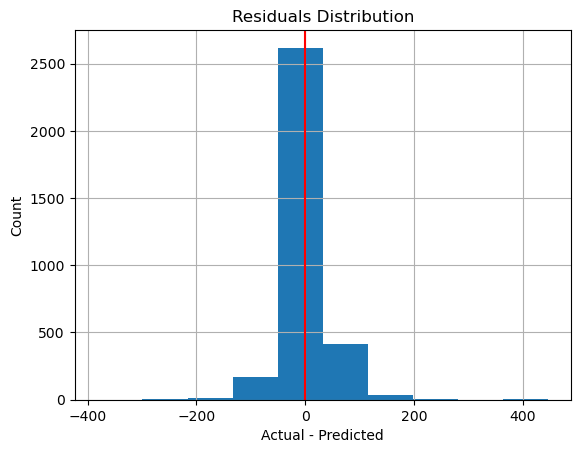

In [33]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [34]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.51
 Over  Estimation: 0.49


In [35]:
print("RMSE: {0:0.2f}".format(mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 41.93


In [36]:
# RMSlE - Root Mean Squared Log Error
# RMSLE Metric is used by Kaggle for this competition

# RMSE Cost Function - Magnitude of difference matters

# RMSLE cost function - "Only Percentage difference matters"

# Reference:Katerina Malahova, Khor SoonHin 
# https://www.slideshare.net/KhorSoonHin/rmsle-cost-function
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [37]:
print('RMSLE')
print(compute_rmsle(100,50),
      compute_rmsle(1000,500),
      compute_rmsle(10000,5000))

RMSLE
0.683294884116934 0.6921486782303559 0.693047195557611


In [38]:
print('RMSLE')
print(compute_rmsle(100,25),
      compute_rmsle(1000,250),
      compute_rmsle(10000,2500))

RMSLE
1.357023978819778 1.383301840183437 1.3859944360988967


In [39]:
print('RMSE')
print(mean_squared_error([100],[50])**.5,
      mean_squared_error([1000],[500])**.5, 
      mean_squared_error([10000],[5000])**.5)

RMSE
50.0 500.0 5000.0


In [40]:
print('RMSE')
print(mean_squared_error([100],[25])**.5,
      mean_squared_error([1000],[250])**.5, 
      mean_squared_error([10000],[2500])**.5)

RMSE
75.0 750.0 7500.0


In [41]:
print("RMSLE: {0}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.5714616911991258


In [42]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [43]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [44]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [45]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [46]:
result = regressor.predict(X_test)

In [47]:
result[:5]

array([11.165173 ,  2.657467 , -1.8472886,  1.3844051,  1.3844051],
      dtype=float32)

In [48]:
df_test["count"] = result

In [49]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,11.165173
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,2.657467
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-1.847289
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.384405
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.384405


In [50]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,-1.847289
26,2011-01-21 02:00:00,1,0,1,3,9.84,12.120,75,11.0014,2011,1,21,4,2,-19.050346
28,2011-01-21 04:00:00,1,0,1,2,9.02,12.880,87,6.0032,2011,1,21,4,4,-4.592363
51,2011-01-22 03:00:00,1,0,0,2,1.64,1.515,41,19.0012,2011,1,22,5,3,-5.789734
52,2011-01-22 04:00:00,1,0,0,2,0.82,0.760,48,19.9995,2011,1,22,5,4,-7.075527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,2012-12-30 06:00:00,1,0,0,2,9.84,9.850,52,27.9993,2012,12,30,6,6,-23.959255
6470,2012-12-31 01:00:00,1,0,1,1,7.38,9.090,55,12.9980,2012,12,31,0,1,-1.091379
6471,2012-12-31 02:00:00,1,0,1,1,6.56,8.335,59,11.0014,2012,12,31,0,2,-8.391899
6472,2012-12-31 03:00:00,1,0,1,1,6.56,9.090,59,7.0015,2012,12,31,0,3,-14.456468


In [51]:
df_test["count"] = df_test["count"].map(adjust_count)

In [52]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [53]:
# RMSLE (Kaggle) Score
# Test 1: 0.62